# Real-Time Optimization
## Williams-Otto reactor system

In [30]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from rto.models.williams_otto import WilliamsOttoReactor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
plant = WilliamsOttoReactor()

In [41]:
def input_decision_surface(model, noise=0.01, grid_size=50):
    fig, ax = plt.subplots(1, 3, figsize=(16,6))

    u1 = np.linspace(3, 6, grid_size)
    u2 = np.linspace(85, 95, grid_size)

    xx, yy = np.meshgrid(u1, u2)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    cost = np.array([model.get_objective(x, noise) for x in grid])
    g = np.array([model.get_constraints(x, noise) for x in grid])
    # reshape the predictions back into a grid
    zz_cost = cost.reshape(xx.shape)
    zz_g0 = g[:,0].reshape(xx.shape)
    zz_g1 = g[:,1].reshape(xx.shape)

    CS = ax[0].contourf(xx, yy, zz_cost)
    fig.colorbar(CS, ax=ax[0])
    CS = ax[1].contourf(xx, yy, zz_g1)
    fig.colorbar(CS, ax=ax[1])
    CS = ax[2].contourf(xx, yy, zz_g1)
    fig.colorbar(CS, ax=ax[2])

    ax[0].set_title('Fobj')
    ax[1].set_title('$Restriction: g_0$')
    ax[2].set_title('$Restriction: g_1$')

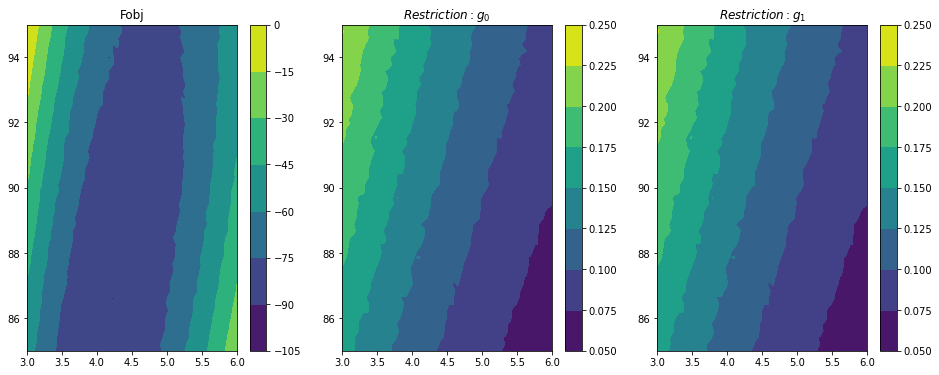

In [42]:
# Plot the decision surface
input_decision_surface(plant)